In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)

### Prepare datase

In [ ]:
df = pd.read_csv('df.csv', sep=';')

In [ ]:
test = pd.read_csv('test.csv', sep=';')
train = pd.read_csv('train.csv', sep=';')

In [ ]:
train = train[train['vote_count'] > 1]
test = test[test['vote_count'] > 1]

In [ ]:
X_test, y_test = test.drop(columns='vote_average'), test['vote_average']
X_train, y_train = train.drop(columns='vote_average'), train['vote_average']

# Modeling

## Descriptive models

In [ ]:
features = set(X_train.columns).difference(['overview',
                                            'id',
                                            'overview_tokenized',
                                            'vote_label'])

In [ ]:
cb = CatBoostRegressor(verbose=0)

In [ ]:
cb.fit(X_train[features], y_train)

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
preds = cb.predict(X_test[features])

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, cb.predict(X_test[features])))}')

RMSE: 0.5122982101546814


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test[features])

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
r2_score(y_test, preds)

0.5687064277969862

In [ ]:
mean_absolute_error(y_test, preds)

0.3914399604796639

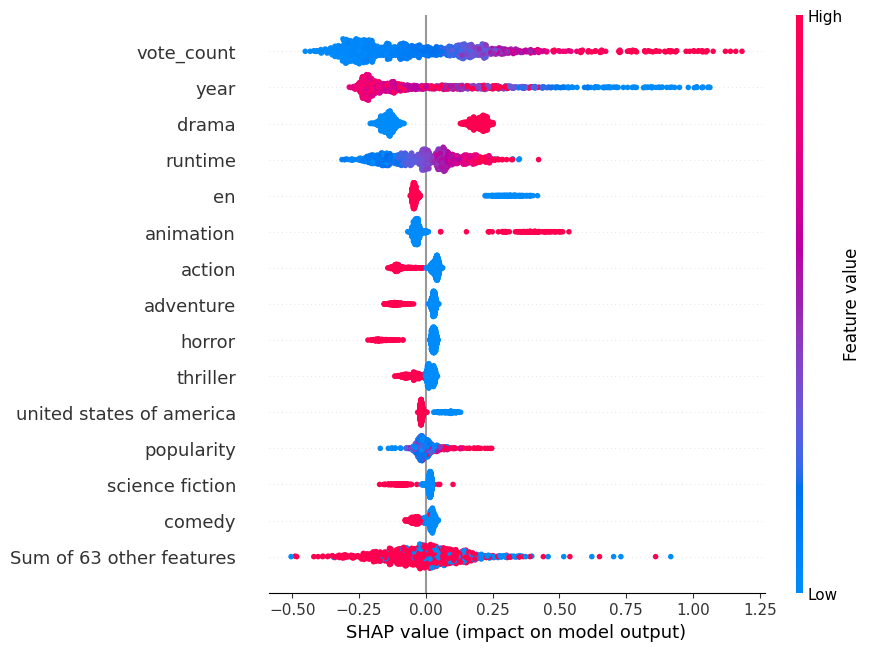

In [ ]:
  shap.plots.beeswarm(shap_values, max_display=15)


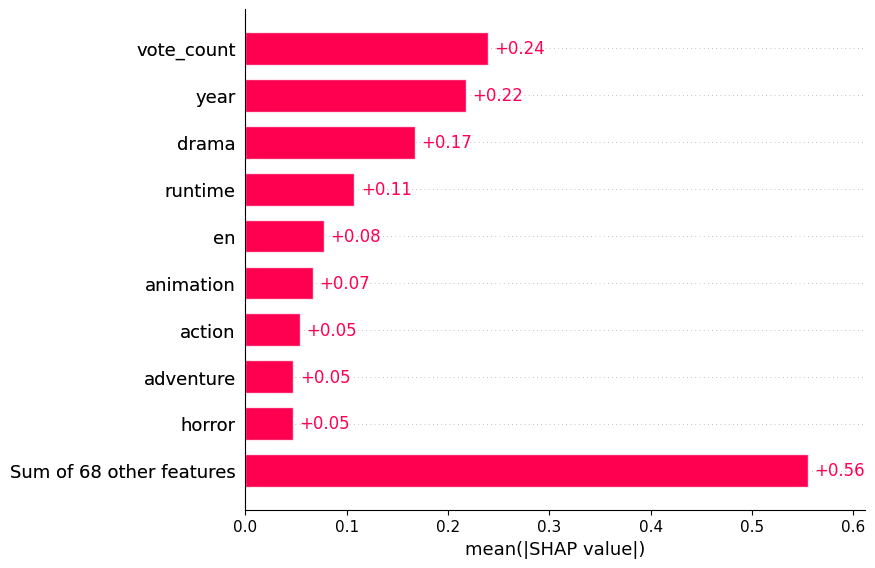

In [ ]:
shap.plots.bar(shap_values)

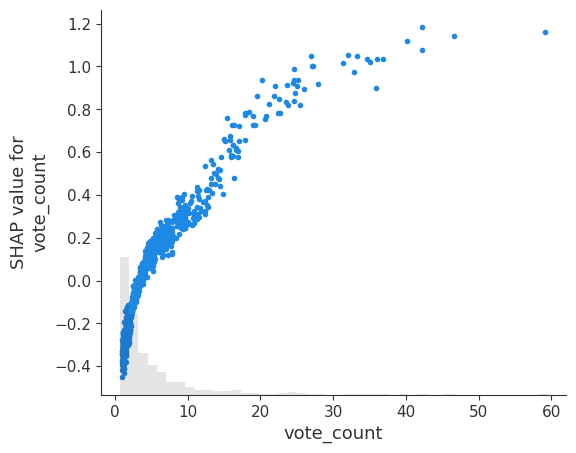

In [ ]:
shap.plots.scatter(shap_values[:,"vote_count"])

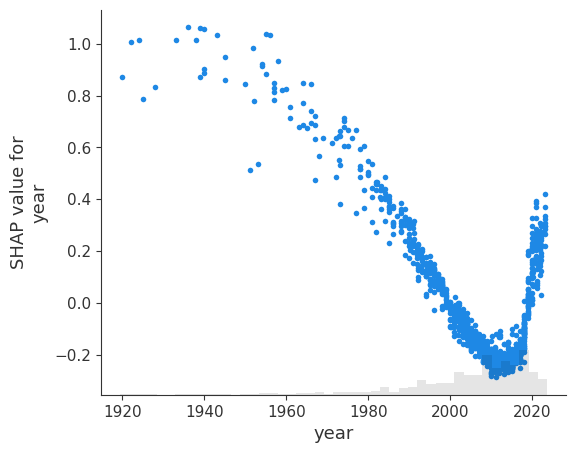

In [ ]:
shap.plots.scatter(shap_values[:,"year"])

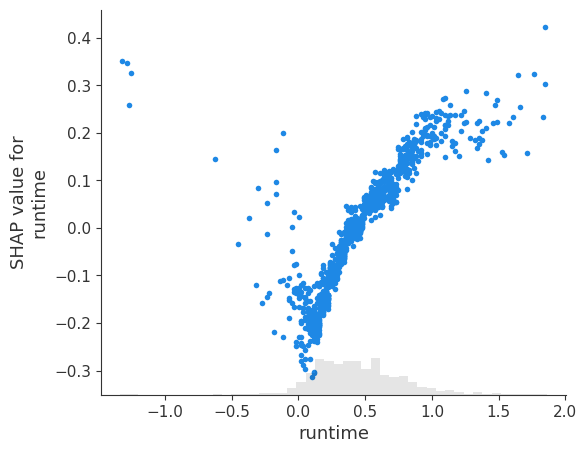

In [ ]:
shap.plots.scatter(shap_values[:,"runtime"])

## Predictive models

In [ ]:
df = pd.read_csv('df.csv', sep=';')

In [ ]:
df.head()

,id,vote_average,vote_count,status,revenue,runtime,adult,budget,overview,popularity,vote_label,year,month,day,quarter,de,en,es,fr,it,ja,ot,action,science fiction,adventure,drama,crime,thriller,fantasy,comedy,romance,western,mystery,war,animation,family,horror,music,history,tv movie,documentary,no genre,no pc,warner bros. pictures,metro-goldwyn-mayer,paramount,columbia pictures,universal pictures,arte,20th century fox,bbc,united states of america,no country,france,united kingdom,germany,japan,italy,english,no language,french,spanish,german,japanese,italian
0,27205,8.364,34495,1,1,148,0,1,"Cobb, a skilled thief who commits corporate es...",83.952,8,2010,7,15,3,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
1,157336,8.417,32571,1,1,169,0,1,The adventures of a group of explorers who mak...,140.241,8,2014,11,5,4,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
2,155,8.512,30619,1,1,152,0,1,Batman raises the stakes in his war on crime. ...,130.643,8,2008,7,16,3,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0
3,19995,7.573,29815,1,1,162,0,1,"In the 22nd century, a paraplegic Marine is di...",79.932,7,2009,12,15,5,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
4,24428,7.710,29166,1,1,143,0,1,When an unexpected enemy emerges and threatens...,98.082,7,2012,4,25,2,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df[['id', 'budget']]

In [ ]:
features_pred = set(X_train.columns).difference(['overview',
                                            'id',
                                            'overview_tokenized',
                                            'vote_label',
                                            'revenue',
                                            'vote_count',
                                            'popularity',
                                            'year',
                                            'month',
                                            'day'])

In [ ]:
cb_pred = CatBoostRegressor(verbose=0)

In [ ]:
cb_pred.fit(X_train[features_pred], y_train)

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
preds = cb_pred.predict(X_test[features])

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, cb_pred.predict(X_test[features])))}')

RMSE: 0.6498602590303306


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
r2_score(y_test, preds)

0.3059875407298718

In [ ]:
mean_absolute_error(y_test, preds)

0.5118727715696836